**Company : Cognifront**

---

**Machine Learning Intern**

---

**Name : Neha Deo**

---

**Assignment : Solve the K-Means Algorithm using the given dataset driver_data.csv** 

---

**Objective : As this is the Clustering Algorithm it does not contain target variable. You have to form the clusters using K-Means Algorithm.
When the data is partitioned into clusters and you get additional new column convert that dataframe to new csv.**

---

**1] Importing Library and Acquire the Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("/content/driver_data.csv")

**Printing First 5 Records**

In [ ]:
df.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


**Printing Last 5 Records**

In [ ]:
df.tail()

,Distance_Feature,Speeding_Feature
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5
3999,168.03,9


**2] Preprocess the Data**

In [ ]:
# Applying Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

In [ ]:
df_scaled[:5,]

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       [-0.38066642,  0.8228745 ],
       [-0.40142849,  1.04174351]])

**3] Train the Model**

In [ ]:
from sklearn.cluster import KMeans
ssq = []
for K in range(1,11):
  my_model = KMeans(n_clusters=K, random_state=123)
  result = my_model.fit(df_scaled)
  ssq.append(result.inertia_)

**Plotting Scree Plot using Matplotlib**

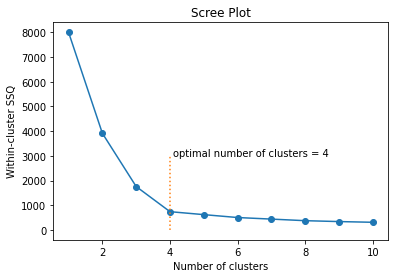

In [ ]:
plt.plot(range(1,11), ssq, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster SSQ")
plt.title("Scree Plot")
plt.plot([4]*3000, range(1,3001), ":")
plt.text(4.1, 3000, "optimal number of clusters = 4")
plt.show()

**Again, Fitting K-Means Model with K=4**

In [ ]:
my_model = KMeans(n_clusters=4, random_state=163)
result = my_model.fit(df_scaled)
result.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

**4] Test the Model**

In [ ]:
predictions = result.predict(df_scaled)
predictions[:5]

array([2, 2, 2, 2, 2], dtype=int32)

**Plotting data partitioned into Clusters**

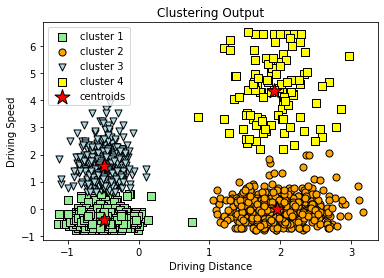

In [ ]:
plt.scatter(df_scaled[predictions==0,0], df_scaled[predictions==0, 1], s=50, c='lightgreen', marker='s', 
            edgecolors='black', label='cluster 1')

plt.scatter(df_scaled[predictions==1,0], df_scaled[predictions==1, 1], s=50, c='orange', marker='o', 
            edgecolors='black', label='cluster 2')

plt.scatter(df_scaled[predictions==2,0], df_scaled[predictions==2, 1], s=50, c='lightblue', marker='v', 
            edgecolors='black', label='cluster 3')

plt.scatter(df_scaled[predictions==3,0], df_scaled[predictions==3, 1], s=50, c='yellow', marker='s', 
            edgecolors='black', label='cluster 4')

plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s=250, c='red', marker='*', 
            edgecolors='black', label='centroids')

plt.legend(scatterpoints=1)
plt.xlabel("Driving Distance")
plt.ylabel("Driving Speed")
plt.title("Clustering Output")
plt.show()

In [ ]:
# Re-labelling the Predictions

predictions_relabelled = np.where(predictions==0, "A", 
                         np.where(predictions==1, "B", 
                         np.where(predictions==2,"C","D")))

df['category'] = pd.Series(predictions_relabelled, index=df.index)

df.index.name = "Number"

**Printing First 5 Records**

In [ ]:
df.head()

,Distance_Feature,Speeding_Feature,category
Number,,,
0,71.24,28,C
1,52.53,25,C
2,64.54,27,C
3,55.69,22,C
4,54.58,25,C


**Printing Last 5 Records**

In [ ]:
df.tail()

,Distance_Feature,Speeding_Feature,category
Number,,,
3995,160.04,10,B
3996,176.17,5,B
3997,170.91,12,B
3998,176.14,5,B
3999,168.03,9,B


**Printing new dataframe to new CSV file**

In [ ]:
df.to_csv("new_output.csv", index=False)

**Output of new CSV file**

In [ ]:
df.head()

,Distance_Feature,Speeding_Feature,category
Number,,,
0,71.24,28,C
1,52.53,25,C
2,64.54,27,C
3,55.69,22,C
4,54.58,25,C
